In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 400)

In [2]:
df = pd.read_csv('Iowa_Liquor_Sales.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (6,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(21190664, 24)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21190664 entries, 0 to 21190663
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    object        
 1   Date                   datetime64[ns]
 2   Store Number           object        
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               object        
 7   Store Location         object        
 8   County Number          object        
 9   County                 object        
 10  Category               float64       
 11  Category Name          object        
 12  Vendor Number          float64       
 13  Vendor Name            object        
 14  Item Number            object        
 15  Item Description       object        
 16  Pack                   int64         
 17  Bottle Volume (ml)     int64         
 18  State Bottle Cost   

In [61]:
df.head(2)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Cost (Dollars)
0,S31296100034,2016-03-16,3762,Wine and Spirits Gallery,7690 HICKMAN RD,WINDSOR HEIGHTS,50322.0,NaN,77.0,Polk,1081200.0,CREAM LIQUEURS,330.0,Gemini Spirits,80457,Ryan's Cream Liqueur,12,1000,7.23,10.85,1,10.85,1.0,0.26,7.23
1,INV-20599500022,2019-07-15,4320,Fareway Stores #470 / Perry,NaN,NaN,NaN,NaN,NaN,NaN,1012200.0,Scotch Whiskies,421.0,SAZERAC COMPANY INC,10008,Scoresby Rare Scotch,6,1750,10.50,15.75,6,94.50,10.5,2.77,63.00


#### План исследования:
1. За какой период представлены данные?
2. Много ли пропусков в данных?
3. Исследуем продажи в кол-вах:
- по месяцам
- по магазинам
- по округам
- по категориям
- по вендорам
- по объему бутылки
- по диапазонам цен
4. Анализируем выручку в тех же разрезах
5. Анализируем маржу в тех же разрезах

In [13]:
# За какой период представлены данные?
df['Date'].min(), df['Date'].max()

(Timestamp('2012-01-03 00:00:00'), Timestamp('2021-04-30 00:00:00'))

In [39]:
df[['Store Number', 
    'County Number', 
    'Category',
    'Vendor Number']] = df[['Store Number', 
                            'County Number', 
                            'Category',
                            'Vendor Number']].astype('object')

In [62]:
df['Cost (Dollars)'] = df['State Bottle Cost'] * df['Bottles Sold']
df['Profit (Dollars)'] = df['Sale (Dollars)'] - df['Cost (Dollars)']

In [63]:
# Разбиваем признаки по типам: числовые, нечисловые
num_features = df.select_dtypes("number").columns.to_list()
dum_features = df.select_dtypes("object").columns.to_list()
len(num_features), len(dum_features)

(10, 15)

In [41]:
# Посмотрим на долю пропусков и уникальных значений в числовых признаках:
isna_share_data = df[num_features].isnull().sum()/df.shape[0]*100
isna_sum_data = df[num_features].isnull().sum()
nun_share_data = df[num_features].nunique(dropna=False)/df.shape[0]*100
nun_sum_data = df[num_features].nunique(dropna=False)

In [42]:
cols = {0: 'isna_share', 1: 'isna_sum', 2: 'nunique_share', 3: 'nunique'}
num_df = pd.concat([isna_share_data, isna_sum_data, nun_share_data, nun_sum_data], axis=1).rename(columns=cols)
num_df

,isna_share,isna_sum,nunique_share,nunique
Pack,0.000000,0,0.000127,27
Bottle Volume (ml),0.000000,0,0.000264,56
State Bottle Cost,0.000047,10,0.014756,3127
State Bottle Retail,0.000047,10,0.016979,3598
Bottles Sold,0.000000,0,0.002831,600
Sale (Dollars),0.000047,10,0.137277,29090
Volume Sold (Liters),0.000000,0,0.006456,1368
Volume Sold (Gallons),0.000000,0,0.007683,1628


In [43]:
# Посмотрим на долю пропусков и уникальных значений в категориальных признаках:
isna_share_data_dum = df[dum_features].isnull().sum()/df.shape[0]*100
isna_sum_data_dum = df[dum_features].isnull().sum()
nun_share_data_dum = df[dum_features].nunique(dropna=False)/df.shape[0]*100
nun_sum_data_dum = df[dum_features].nunique(dropna=False)

In [44]:
cols = {0: 'isna_share', 1: 'isna_sum', 2: 'nunique_share', 3: 'nunique'}
dum_df = pd.concat(
    [isna_share_data_dum, isna_sum_data_dum, nun_share_data_dum, nun_sum_data_dum], axis=1
).rename(columns=cols)
dum_df

,isna_share,isna_sum,nunique_share,nunique
Invoice/Item Number,0.000000,0,100.000000,21190664
Store Number,0.000000,0,0.012199,2585
Store Name,0.000000,0,0.012926,2739
Address,0.377487,79992,0.017904,3794
City,0.377482,79991,0.003969,841
Zip Code,0.377695,80036,0.004507,955
Store Location,9.590945,2032385,0.009655,2046
County Number,0.739930,156796,0.000472,100
County,0.739920,156794,0.000953,202
Category,0.080101,16974,0.000529,112


In [64]:
df_month_sum = df[num_features+['Date']].groupby(pd.Grouper(key='Date', freq='1M')).sum()
df_year_sum = df_month_sum[num_features].groupby(pd.Grouper(freq='1Y')).mean()

In [67]:
df_year_sum['Volume Sold (Liters) LY'] = df_year_sum['Volume Sold (Liters)'].shift()
df_year_sum['Sale (Dollars) LY'] = df_year_sum['Sale (Dollars)'].shift()
df_year_sum['Cost (Dollars) LY'] = df_year_sum['Cost (Dollars)'].shift()
df_year_sum['Profit (Dollars) LY'] = df_year_sum['Profit (Dollars)'].shift()

df_year_sum['Volume Sold (Liters) LY share'] = (df_year_sum['Volume Sold (Liters)'] - df_year_sum['Volume Sold (Liters) LY']) / df_year_sum['Volume Sold (Liters) LY'] * 100
df_year_sum['Sale (Dollars) LY share'] = (df_year_sum['Sale (Dollars)'] - df_year_sum['Sale (Dollars) LY']) / df_year_sum['Sale (Dollars) LY'] * 100
df_year_sum['Cost (Dollars) LY share'] = (df_year_sum['Cost (Dollars)'] - df_year_sum['Cost (Dollars) LY']) / df_year_sum['Cost (Dollars) LY'] * 100
df_year_sum['Profit (Dollars) LY share'] = (df_year_sum['Profit (Dollars)'] - df_year_sum['Profit (Dollars) LY']) / df_year_sum['Profit (Dollars) LY'] * 100

df_year_sum['Sale per Liter (Dollars)'] = df_year_sum['Sale (Dollars)'] / df_year_sum['Volume Sold (Liters)']
df_year_sum['Cost per Liter (Dollars)'] = df_year_sum['Cost (Dollars)'] / df_year_sum['Volume Sold (Liters)']

In [91]:
df_year_sum

,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Cost (Dollars),Profit (Dollars),Volume Sold (Liters) LY,Sale (Dollars) LY,Cost (Dollars) LY,Profit (Dollars) LY,Volume Sold (Liters) LY share,Sale (Dollars) LY share,Cost (Dollars) LY share,Profit (Dollars) LY share,Sale per Liter (Dollars),Cost per Liter (Dollars)
Date,,,,,,,,,,,,,,,,,,,,
2012-12-31,2.093530e+06,1.636653e+08,1.590013e+06,2.391826e+06,1.659784e+06,2.126694e+07,1.562940e+06,412904.316667,1.413540e+07,7.131541e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.607012,9.044110
2013-12-31,2.076452e+06,1.606832e+08,1.613999e+06,2.427180e+06,1.661224e+06,2.150865e+07,1.548038e+06,408974.237500,1.429760e+07,7.211045e+06,1.562940e+06,2.126694e+07,1.413540e+07,7.131541e+06,-0.953487,1.136537,1.147492,1.114823,13.894140,9.235954
2014-12-31,2.118652e+06,1.627469e+08,1.680258e+06,2.525251e+06,1.722188e+06,2.254898e+07,1.596468e+06,421771.875834,1.499839e+07,7.550592e+06,1.548038e+06,2.150865e+07,1.429760e+07,7.211045e+06,3.128489,4.836793,4.901392,4.708709,14.124293,9.394732
2015-12-31,2.233358e+06,1.683536e+08,1.786996e+06,2.683708e+06,1.797704e+06,2.369405e+07,1.634809e+06,431908.367501,1.577195e+07,7.922094e+06,1.596468e+06,2.254898e+07,1.499839e+07,7.550592e+06,2.401604,5.078144,5.157675,4.920164,14.493469,9.647585
2016-12-31,2.351460e+06,1.754348e+08,1.900366e+06,2.851839e+06,1.889193e+06,2.495396e+07,1.691689e+06,446924.077501,1.660009e+07,8.353877e+06,1.634809e+06,2.369405e+07,1.577195e+07,7.922094e+06,3.479314,5.317437,5.250667,5.450368,14.750920,9.812731
2017-12-31,2.374308e+06,1.745279e+08,1.927572e+06,2.891777e+06,1.999168e+06,2.621084e+07,1.758071e+06,464474.876667,1.752919e+07,8.681645e+06,1.691689e+06,2.495396e+07,1.660009e+07,8.353877e+06,3.924018,5.036768,5.596994,3.923538,14.908863,9.970697
2018-12-31,2.447880e+06,1.785265e+08,2.000428e+06,3.001059e+06,2.119587e+06,2.785140e+07,1.824665e+06,481597.567500,1.858282e+07,9.268579e+06,1.758071e+06,2.621084e+07,1.752919e+07,8.681645e+06,3.787921,6.259115,6.010729,6.760635,15.263843,10.184238
2019-12-31,2.464698e+06,1.738920e+08,2.051920e+06,3.078358e+06,2.237028e+06,2.910170e+07,1.858452e+06,489876.943334,1.939885e+07,9.702844e+06,1.824665e+06,2.785140e+07,1.858282e+07,9.268579e+06,1.851663,4.489151,4.391296,4.685342,15.659106,10.438178
2020-12-31,2.646272e+06,1.834278e+08,2.364650e+06,3.547514e+06,2.486772e+06,3.305526e+07,2.017638e+06,531791.675834,2.204979e+07,1.100547e+07,1.858452e+06,2.910170e+07,1.939885e+07,9.702844e+06,8.565548,13.585346,13.665456,13.425182,16.383144,10.928515


In [87]:
# среднемесячный росто потребления в %
df_year_sum.iloc[2:-2]['Volume Sold (Liters) LY share'].mean()

3.0955017588882945

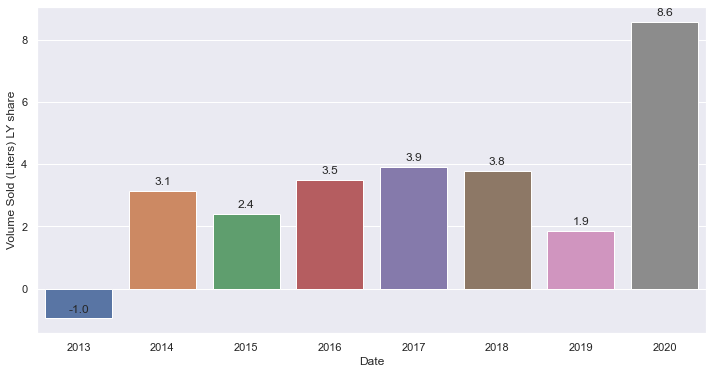

In [97]:
rcParams['figure.figsize'] = 12, 6
g = sns.barplot(x=df_year_sum.iloc[1:-1].index.year, y='Volume Sold (Liters) LY share', data=df_year_sum.iloc[1:-1])
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

In [92]:
# среднемесячный росто потребления в %
df_year_sum.iloc[2:-2]['Profit (Dollars) LY share'].mean()

5.074792741986658

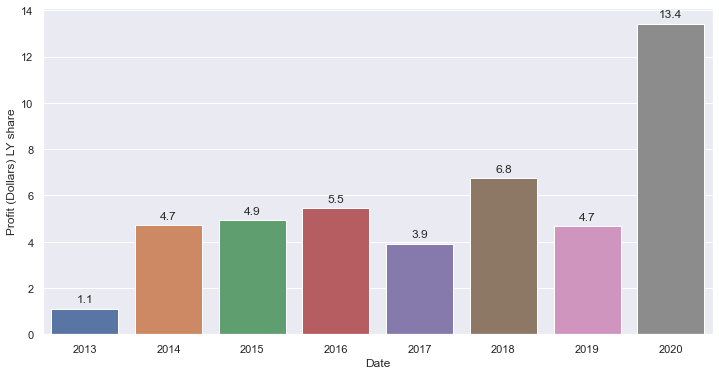

In [96]:
rcParams['figure.figsize'] = 12, 6
g = sns.barplot(x=df_year_sum.iloc[1:-1].index.year, y='Profit (Dollars) LY share', data=df_year_sum.iloc[1:-1])
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

In [137]:
df_store_sum = df[num_features+['Store Name']].groupby('Store Name').sum()

In [138]:
df_store_sum['Sale per Liter (Dollars)'] = df_store_sum['Sale (Dollars)'] / df_store_sum['Volume Sold (Liters)']
df_store_sum['Cost per Liter (Dollars)'] = df_store_sum['Cost (Dollars)'] / df_store_sum['Volume Sold (Liters)']
df_store_sum['Profit (Dollars) share'] = df_store_sum['Profit (Dollars)'] / df_store_sum['Sale (Dollars)']*100

df_store_sum['Sale per Liter (Dollars) volume'] = df_store_sum['Sale per Liter (Dollars)']/df_store_sum['Sale per Liter (Dollars)'].sum()*100
df_store_sum['Volume Sold (Liters) volume'] = df_store_sum['Volume Sold (Liters)']/df_store_sum['Volume Sold (Liters)'].sum()*100

In [143]:
cols = [
    'Sale (Dollars)', 
    'Volume Sold (Liters)', 
    'Profit (Dollars)', 
]
df_store_sum[cols] = df_store_sum[cols].astype('int')

In [139]:
df_store_sum['Cost per Liter (Dollars)'].mean()

10.675150614618465

In [144]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cols = [
    'Sale (Dollars)', 
    'Sale per Liter (Dollars) volume',
    'Volume Sold (Liters)', 
    'Volume Sold (Liters) volume', 
    'Profit (Dollars)', 'Profit (Dollars) share', 
    'Cost per Liter (Dollars)']
df_store_sum[cols].sort_values(by='Sale (Dollars)', ascending=False).head(10)

,Sale (Dollars),Sale per Liter (Dollars) volume,Volume Sold (Liters),Volume Sold (Liters) volume,Profit (Dollars),Profit (Dollars) share,Cost per Liter (Dollars)
Store Name,,,,,,,
Hy-Vee #3 / BDI / Des Moines,91583655,0.04,5344305,2.76,30418498,33.21,11.44
Central City 2,78430817,0.04,4403284,2.27,26095209,33.27,11.89
Hy-Vee Wine and Spirits / Iowa City,39085541,0.03,2532710,1.31,13010803,33.29,10.30
Sam's Club 8162 / Cedar Rapids,33864384,0.03,2332267,1.20,11293203,33.35,9.68
Sam's Club 6344 / Windsor Heights,32206916,0.03,2235396,1.15,10740367,33.35,9.60
Lot-A-Spirits,27463792,0.04,1544262,0.80,9141089,33.28,11.87
Wilkie Liquors,24971114,0.03,1720873,0.89,8306500,33.26,9.68
Benz Distributing,23359715,0.04,1279118,0.66,7785075,33.33,12.18
Sam's Club 8238 / Davenport,22820354,0.03,1566106,0.81,7603209,33.32,9.72


In [182]:
df_store_year_sum = df[num_features+['Date', 'Store Name']].groupby(
    [pd.Grouper(key='Date', freq='1Y'), 'Store Name']
).sum().reset_index().sort_values(by=['Store Name', 'Date'], ascending=[False, True])

In [183]:
df_store_year_sum

,Date,Store Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Cost (Dollars),Profit (Dollars)
11701,2019-12-31,k food mart / Monticello,659,34400,340.25,510.48,580,3758.37,320.10,84.36,2506.51,1251.86
11700,2019-12-31,goPuff / Iowa City,1170,94750,1359.65,2039.74,610,10801.08,517.50,136.13,7201.17,3599.91
13582,2020-12-31,goPuff / Iowa City,5718,531250,7307.50,10962.29,6394,106350.72,5791.50,1526.54,70959.76,35390.96
15420,2021-12-31,goPuff / Iowa City,1602,148950,1735.88,2604.06,2450,34043.22,2119.50,558.91,22699.02,11344.20
9942,2018-12-31,goPuff / Ames,1044,72750,1464.23,2196.58,312,6896.13,234.00,61.41,4596.91,2299.22
...,...,...,...,...,...,...,...,...,...,...,...,...
11702,2020-12-31,'Da Booze Barn / West Bend,9710,1023250,12936.33,19406.27,6454,113479.50,7277.40,1916.90,75701.26,37778.24
13583,2021-12-31,'Da Booze Barn / West Bend,3062,351950,4948.77,7423.70,1863,35736.85,2215.85,583.50,23843.88,11892.97
5153,2016-12-31,"""Double """"D"""" Liquor Store""",10352,918625,9476.81,14217.33,7965,110972.24,8224.18,2172.79,74634.12,36338.12
6724,2017-12-31,"""Double """"D"""" Liquor Store""",27592,2335800,23895.62,35849.02,20796,301828.34,22428.75,5925.18,201790.73,100037.61


In [185]:
df_store_year_sum['Profit (Dollars) LY'] = df_store_year_sum.groupby(['Store Name'])['Profit (Dollars)'].shift()
df_store_year_sum['Profit (Dollars) LY share'] = (df_store_year_sum['Profit (Dollars)'] / df_store_year_sum['Profit (Dollars) LY'] - 1)*100

In [194]:
cols = [
    'Store Name',
    'Sale (Dollars)',
    'Volume Sold (Liters)',
    'Profit (Dollars)',
    'Profit (Dollars) LY share'
]
df_store_year_sum[cols].loc[df_store_year_sum['Date']=='2020-12-31'].sort_values(
    by='Profit (Dollars) LY share', ascending=False
).head(10).set_index('Store Name')

,Sale (Dollars),Volume Sold (Liters),Profit (Dollars),Profit (Dollars) LY share
Store Name,,,,
Hometown Foods - Conrad,40140.53,3029.00,13320.23,3268.54
Shortee's Pit Stop / Speedway Cafe,44163.75,3303.52,14621.23,1730.77
CIRCLE K #4706601 / BURLINGTON,25290.31,771.82,8446.17,1589.67
Hometown Foods - Hubbard,47961.05,4628.00,16006.13,1223.54
GM Mart / Iowa City,142654.70,6383.51,47559.62,997.13
goPuff / Iowa City,106350.72,5791.50,35390.96,883.11
Keystone Liquor,442166.81,17420.08,146852.04,750.44
Moti's Food,42259.69,2125.16,14045.22,714.55
Hy-Vee Gas #1 / Ankeny,27760.41,1177.50,9241.92,714.13
